## Regularization Methods Example 1.1
In the figure below, the ridge regression coefficient estimates for the **Credit**  data set are displayed. Each curve corresponds to the ridge regression coefficient estimate for one of the ten variables, plotted as a function of $ \ln(\lambda) $. For example, the blue solid line represents the ridge regression estimate for the **income** coefficient, as $\lambda$ is varied. At the extreme left-hand side of the plot, $\lambda$ is essentially zero, and so the corresponding ridge coefficient estimates are the same as the usual least squares estimates. But as $\lambda$ increases, the ridge coefficient estimates shrink towards zero. When $\lambda$ is extremely large, then all of the ridge coefficient estimates are basically zero; this corresponds to the null model that contains no predictors.

While the ridge coefficient estimates tend to decrease in aggregate as $\lambda$ increases, individual coefficients, such as **rating** and **income**, may occasionally increase as $\lambda$ increases.

## Sklearn version:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('./data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Model for different lambda
n = 100
lambda_ = np.exp(np.linspace(-5, 5, n))

params = pd.DataFrame(columns=x.columns)
for i in range(n):
    reg = Ridge(alpha=lambda_[i], normalize=True)
    reg = reg.fit(x, y)
    params.loc[np.log(lambda_[i]), :] = reg.coef_

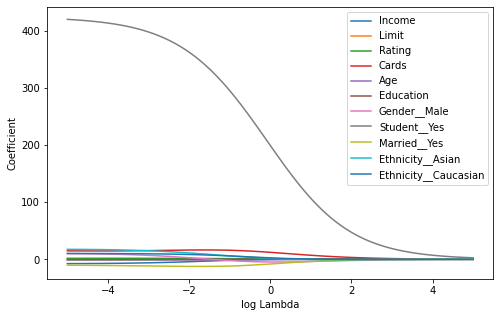

In [2]:
import matplotlib.pyplot as plt
# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
params.plot(ax=ax)
plt.xlabel("log Lambda")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

## Statsmodels

Statsmodels seems to have some scaling wrt Alpha, which makes the results difficult to compare with R. (Allthough generally correct)
Furthermore, the implementation seems to be incomplete, for example the summary function is missing. 

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing

# Load data
df = pd.read_csv('./data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
x = sm.add_constant(x)
y = df['Balance']

# Scale to 0 mean:
scaler = preprocessing.StandardScaler(with_std=False).fit(x)
x_scaled = scaler.transform(x)

# Model for different lambda
n = 100
lambda_ = np.linspace(-8, 4, n)
params = pd.DataFrame(columns=x.columns)

for lam in lambda_:
    model = sm.OLS(y, x_scaled)
    model = model.fit_regularized(alpha=np.exp(lam), L1_wt=0)
    params.loc[lam, :] = model.params

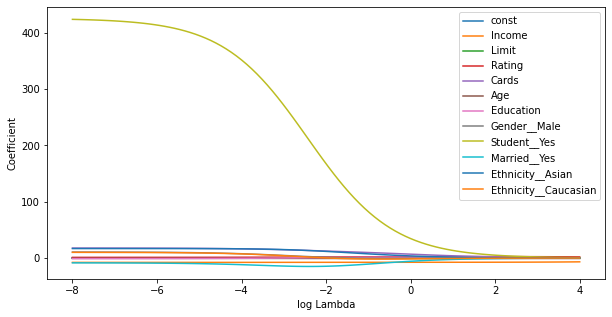

In [11]:
import matplotlib.pyplot as plt
# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
params.plot(ax=ax)
plt.xlabel("log Lambda")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

